# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [274]:
%pip install iso3166

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [275]:
%pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [276]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [277]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [278]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [279]:
df_data.shape

(4324, 9)

In [280]:
df_data.head(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [281]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [282]:
df_data.isna().sum()
# At the time that I started, I saw 3360 NaN values for Price, which probably means that those programs don't have an official price available.  In the 
# head(5) results, I see one belonging to SpaceX, which may not reveal the price for its flights.


Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [283]:
# Let's try to show only those rows where there is a NaN value for price
df_data[df_data['Price'].isna()].head(10)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,13,13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
32,32,32,CASC,"LC-101, Wenchang Satellite Launch Center, China","Tue May 05, 2020 10:00 UTC",Long March 5B | Test Flight (New Crew Capsule),StatusActive,NaN,Success
35,35,35,IRGC,"Launch Plateform, Shahrud Missile Test Site","Wed Apr 22, 2020 03:59 UTC",Qased | Noor 1,StatusActive,NaN,Success
42,42,42,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Mon Mar 16, 2020 18:28 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2545,StatusActive,NaN,Success
43,43,43,CASC,"LC-201, Wenchang Satellite Launch Center, China","Mon Mar 16, 2020 13:34 UTC",Long March 7A | XJY-6,StatusActive,NaN,Failure
52,52,52,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Sun Feb 09, 2020 15:48 UTC",Simorgh | Zafar 1,StatusActive,NaN,Failure


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [284]:
df_clean = df_data.drop('Price', axis=1)

In [285]:
df_clean.head(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,Success


In [286]:
df_clean.shape

(4324, 8)

## Descriptive Statistics

In [287]:
# These will be TBD as I figure out more and more.
df_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


In [288]:
df_data.dtypes

Unnamed: 0.1       int64
Unnamed: 0         int64
Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
dtype: object

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [289]:
# Show the different organizations as specified by the Organisation column in the dataframe

organizations = df_clean.Organisation.dropna().unique()
print(f'There are {len(organizations)} different organizations in the dataset:')
print("Different companies:")

for org in organizations:
    print(org)


There are 56 different organizations in the dataset:
Different companies:
SpaceX
CASC
Roscosmos
ULA
JAXA
Northrop
ExPace
IAI
Rocket Lab
Virgin Orbit
VKS RF
MHI
IRGC
Arianespace
ISA
Blue Origin
ISRO
Exos
ILS
i-Space
OneSpace
Landspace
Eurockot
Land Launch
CASIC
KCST
Sandia
Kosmotras
Khrunichev
Sea Launch
KARI
ESA
NASA
Boeing
ISAS
SRC
MITT
Lockheed
AEB
Starsem
RVSN USSR
EER
General Dynamics
Martin Marietta
Yuzhmash
Douglas
ASI
US Air Force
CNES
CECLES
RAE
UT
OKB-586
AMBA
Arm??e de l'Air
US Navy


In [290]:
# Let's find the number of launches by each organization
# this means grouping the data by the 'Organization' column

org_groups = df_data.groupby('Organisation')
launches_by_org = org_groups.size()
# print(launches_by_org)

# Now show the results organized by descending count
print(launches_by_org.sort_values(ascending=False))

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ESA                   13
ISA                   13
Eurockot              13
Rocket Lab            13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
AMBA                   8
CNES                   8
JAXA                   7
Land Launch            7
MITT                   7
KCST                   5
UT                     5
CASIC                  5
CECLES                 4
Arm??e de l'Air        4
Exos        

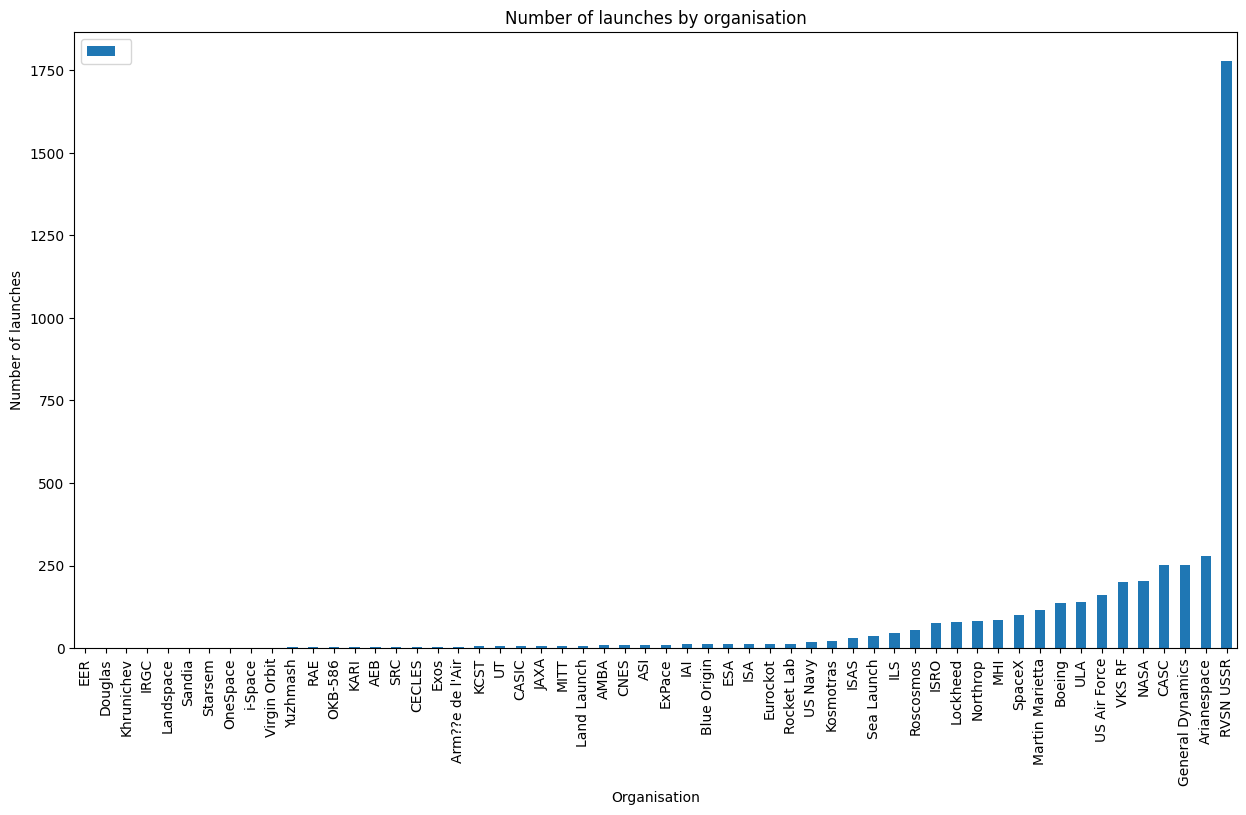

In [291]:
# Given the dataframe org_groups, which is grouped by size, let's create a bar chart showing the results 
import matplotlib.pyplot as plt
org_groups = df_data.groupby('Organisation')
launches_by_org = org_groups.size()

# Set the size of the figure to be larger.
plt.rcParams['figure.figsize'] = (15, 8)

# Let's add a legend
launches_by_org.sort_values(ascending=True).plot(kind='bar', legend=True)
plt.xlabel('Organisation')
plt.ylabel('Number of launches')
plt.title('Number of launches by organisation')
# # Include a number on each bar chart to make it easier to see the count.
# for x, y in enumerate(launches_by_org):
#     plt.text(x, y+0.1, str(y), ha='center')
plt.show()


We can see from the chart data how the RVSN USSR organization has the most launches from any organization, with 

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [292]:
df_active_state = df_data.groupby('Rocket_Status')
df_active_count = df_active_state['Rocket_Status'].count()

In [293]:
df_active_count

Rocket_Status
StatusActive      790
StatusRetired    3534
Name: Rocket_Status, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [294]:
df_success_rate = df_data.groupby('Mission_Status')
df_success_count = df_success_rate['Mission_Status'].count()
df_success_count

Mission_Status
Failure               339
Partial Failure       102
Prelaunch Failure       4
Success              3879
Name: Mission_Status, dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [295]:
df_prices = df_data[df_data.Price.notna()]
new_prices = df_data.Price.str.replace(',', '', regex=True)
df_prices['New_Price'] = pd.to_numeric(new_prices, errors='coerce')
# df_prices.loc[df_prices['Price'].str.contains(','), 'Price'] = df_prices['Price'].str.replace(',', '', regex=True)
# # df_prices.loc[df_prices['Price'].str.contains(','), 'Price'] = df_prices['Price'].str.replace(',', '', regex=True).astype(float)
# # now convert the remaining items in the price column to a float

# df_prices.loc[df_prices['Price'], 'Price'] = df_prices['Price'].astype(float)

# # df_prices['Price'] = df_prices['Price'].astype(float)
df_prices = df_prices.sort_values(by='New_Price', ascending=False)

df_prices.tail(20)
df_prices.info()
df_prices.describe()
df_prices.head()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 1916 to 249
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    964 non-null    int64  
 1   Unnamed: 0      964 non-null    int64  
 2   Organisation    964 non-null    object 
 3   Location        964 non-null    object 
 4   Date            964 non-null    object 
 5   Detail          964 non-null    object 
 6   Rocket_Status   964 non-null    object 
 7   Price           964 non-null    object 
 8   Mission_Status  964 non-null    object 
 9   New_Price       964 non-null    float64
dtypes: float64(1), int64(2), object(7)
memory usage: 82.8+ KB


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,New_Price
1916,1916,1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan","Tue Nov 15, 1988 03:00 UTC",Energiya/Buran | Buran,StatusRetired,"5,000.0",Success,"5,000.00"
2000,2000,2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.0",Success,"5,000.00"
3475,3475,3475,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Apr 11, 1970 19:13 UTC",Saturn V | Apollo 13,StatusRetired,"1,160.0",Success,"1,160.00"
3683,3683,3683,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Apr 04, 1968 12:00 UTC",Saturn V | Apollo 6,StatusRetired,"1,160.0",Partial Failure,"1,160.00"
3243,3243,3243,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Apr 16, 1972 17:54 UTC",Saturn V | Apollo 16,StatusRetired,"1,160.0",Success,"1,160.00"


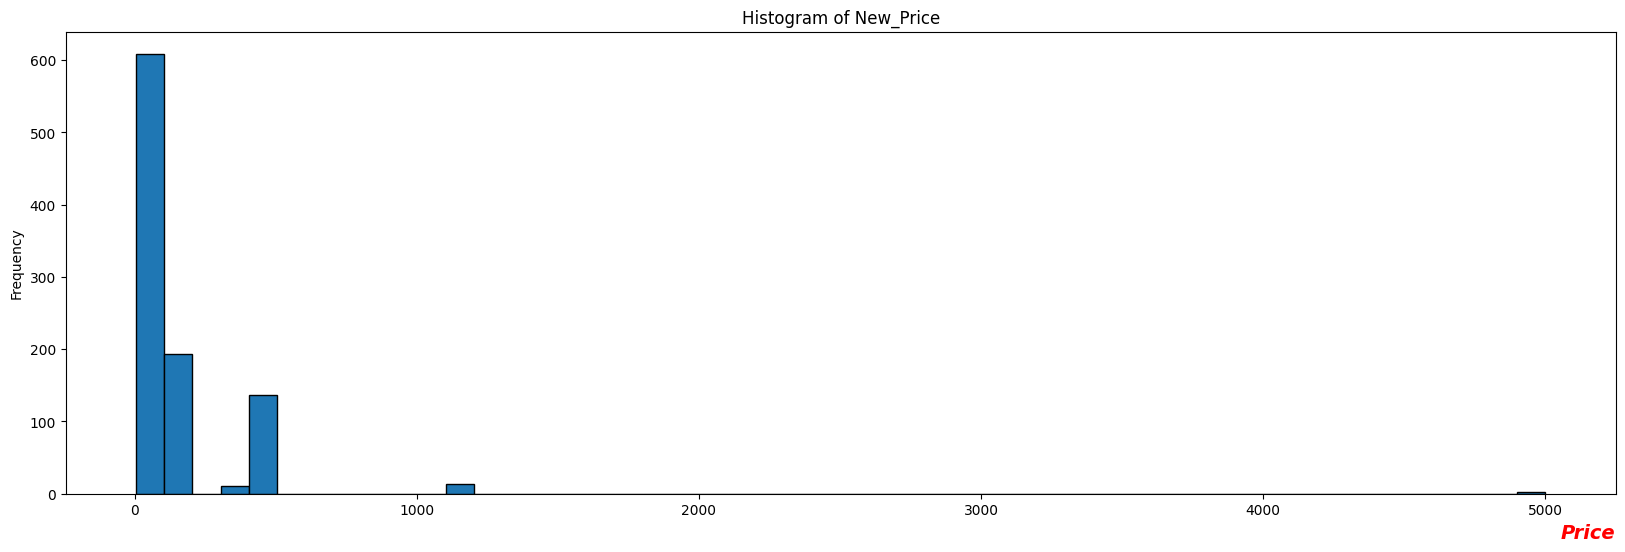

In [296]:
# Let's now create a histogram on the df_priced dataframe, based on the values in the Price column
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

plt.figure(figsize=(20, 6))
plt.hist(df_prices['New_Price'], bins=50, edgecolor='black', density=False)
plt.title(f'Histogram of New_Price')
plt.xlabel('Price', fontsize=14, fontweight='bold', fontstyle='italic', color='red', loc='right')
plt.xticks(rotation=90, minor=True)
plt.ylabel('Frequency')
plt.show()

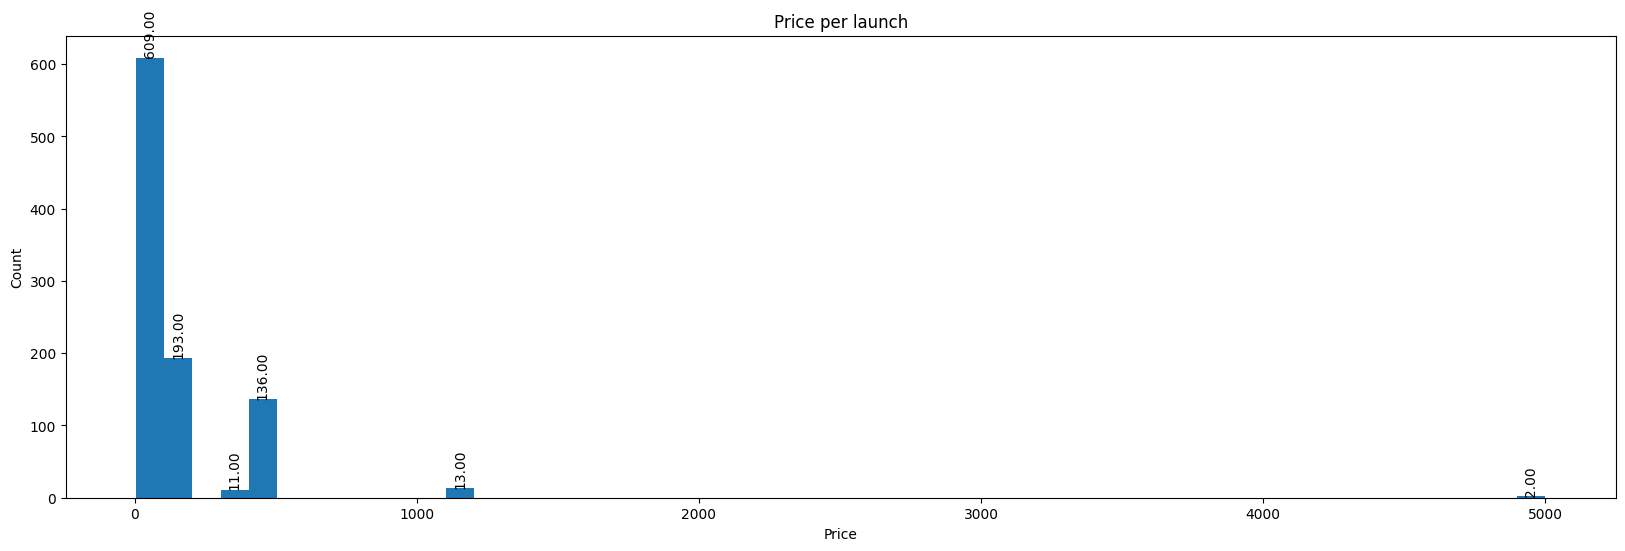

In [297]:
import plotly.express as px
import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 6))
ax.hist(df_prices.New_Price, bins=50)
ax.set_title("Price per launch")
ax.set_ylabel("Count")
ax.set_xlabel("Price")
for r in ax.patches:
    height = r.get_height()
    if height > 0:
        ax.text(r.get_x() + r.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom', rotation=90)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [298]:
# Notice the location is a sequence of values, and the last one is the country.  There may be 3 or 4, so we have to extract the "last" one.
df_data["country"] = df_data.Location.str.split(",").str[-1].str.strip()

# Now lets normalize country name in the df_data dataframe for the "country" column
# Gran Canaria should be USA
# Russia is the Russian Federation
# New Mexico should be USA
# Yellow Sea refers to China
# Shahrud Missile Test Site should be Iran
# Pacific Missile Range Facility should be USA
# Barents Sea should be Russian Federation
# Gran Canaria should be USA
df_data['country'] = df_data['country'].replace({'Russia': 'Russian Federation'})
df_data['country'] = df_data['country'].replace({'New Mexico': 'USA'})
df_data['country'] = df_data['country'].replace({'Yellow Sea': 'China'})
df_data['country'] = df_data['country'].replace({'Shahrud Missile Test Site': 'Iran'})
df_data['country'] = df_data['country'].replace({'Pacific Missile Range Facility': 'USA'})
df_data['country'] = df_data['country'].replace({'Barents Sea': 'Russian Federation'})
df_data['country'] = df_data['country'].replace({'Gran Canaria': 'USA'})



import pycountry

def convert_to_iso(country_name):
    if country_name == "USA":
        return "USA"
    try:
        country = pycountry.countries.get(name=country_name)
        return country.alpha_3
    except AttributeError:
        return None


df_data['iso'] = df_data['country'].apply(convert_to_iso)

df_data.head(10)


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,Kazakhstan,KAZ
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success,China,CHN
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,USA,USA
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success,Japan,JPN


In [299]:
# Count the number of Mission_Status entries for each Organisation in the dataframe named df_data
df_country_launches = df_data.groupby('iso')['Mission_Status'].count().reset_index()
df_country_launches.head(10)

,iso,Mission_Status
0,AUS,6
1,BRA,3
2,CHN,269
3,FRA,303
4,IND,76
5,ISR,11
6,JPN,126
7,KAZ,701
8,KEN,9
9,NZL,13


In [300]:
plt.figure(figsize=(1, 10))

fig = px.choropleth(
    df_country_launches,
    locations='iso',
    hover_name='Mission_Status',
    color='Mission_Status',
    color_continuous_scale=px.colors.sequential.matter,
)

fig.show()

<Figure size 100x1000 with 0 Axes>

# Use a Choropleth Map to Show the Number of Failures by Country


In [301]:
df_data.head(10)


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,Kazakhstan,KAZ
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success,China,CHN
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,USA,USA
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success,Japan,JPN


In [302]:
# Notice the location is a sequence of values, and the last one is the country.  There may be 3 or 4, so we have to extract the "last" one.
df_data["country"] = df_data.Location.str.split(",").str[-1].str.strip()
df_data.head(10)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,Kazakhstan,KAZ
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success,China,CHN
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,USA,USA
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success,Japan,JPN


In [303]:
# Group by the country and the Mission_Status equal to failure
df_failures = df_data.query('Mission_Status == "Failure"')
# Rename column as Failure
df_failures = df_failures.rename(columns={'Mission_Status': 'Failure'})
df_country_failures = df_failures.groupby('iso')['Failure'].count().reset_index()
df_country_failures.head(10)

,iso,Failure
0,AUS,3
1,BRA,2
2,CHN,19
3,FRA,13
4,IND,8
5,ISR,2
6,JPN,10
7,KAZ,72
8,NZL,2
9,RUS,63


In [304]:
plt.figure(figsize=(1, 10))

fig = px.choropleth(
    df_country_failures,
    locations='iso',
    hover_name='Failure',
    color='Failure',
    color_continuous_scale=px.colors.sequential.matter,
)

fig.show()

<Figure size 100x1000 with 0 Axes>

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [305]:
df_data.head(10)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,Kazakhstan,KAZ
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success,China,CHN
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,USA,USA
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success,Japan,JPN


In [306]:
df_sunburst = df_data.groupby(by=['country', 'Organisation', 'Mission_Status'], as_index=False).agg({'iso':pd.Series.count})
#df_sunburst.sort_values(by=['country'], ascending=[True, True, True], inplace=True)
df_sunburst.head(10)


,country,Organisation,Mission_Status,iso
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1
5,Barents Sea,SRC,Failure,1
6,Barents Sea,SRC,Success,2
7,Brazil,AEB,Failure,2
8,Brazil,AEB,Prelaunch Failure,1
9,China,CASC,Failure,14


In [307]:
sb = px.sunburst(df_sunburst, 
                 path=['country', 'Organisation', 'Mission_Status'], 
                 values='iso', 
                 color='country', 
                 color_continuous_scale='Inferno', 
                 width=1200, 
                 height=1200)

sb.show()


In [308]:
df_sunburst2 = df_data.groupby(by=['country', 'Mission_Status', 'Organisation'], as_index=False).agg({'iso':pd.Series.count})
#df_sunburst.sort_values(by=['country'], ascending=[True, True, True], inplace=True)
df_sunburst2.head(10)


,country,Mission_Status,Organisation,iso
0,Australia,Failure,CECLES,2
1,Australia,Failure,RAE,1
2,Australia,Success,AMBA,1
3,Australia,Success,CECLES,1
4,Australia,Success,RAE,1
5,Barents Sea,Failure,SRC,1
6,Barents Sea,Success,SRC,2
7,Brazil,Failure,AEB,2
8,Brazil,Prelaunch Failure,AEB,1
9,China,Failure,CASC,14


In [309]:
sb = px.sunburst(df_sunburst, 
                 path=['country', 'Mission_Status', 'Organisation'], 
                 values='iso', 
                 color='country', 
                 color_continuous_scale='Inferno', 
                 width=1200, 
                 height=1200)

sb.show()


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [310]:
df_prices.head()


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,New_Price
1916,1916,1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan","Tue Nov 15, 1988 03:00 UTC",Energiya/Buran | Buran,StatusRetired,"5,000.0",Success,"5,000.00"
2000,2000,2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.0",Success,"5,000.00"
3475,3475,3475,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Apr 11, 1970 19:13 UTC",Saturn V | Apollo 13,StatusRetired,"1,160.0",Success,"1,160.00"
3683,3683,3683,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Apr 04, 1968 12:00 UTC",Saturn V | Apollo 6,StatusRetired,"1,160.0",Partial Failure,"1,160.00"
3243,3243,3243,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Apr 16, 1972 17:54 UTC",Saturn V | Apollo 16,StatusRetired,"1,160.0",Success,"1,160.00"


In [311]:
df_org_money = df_prices.groupby(by=['Organisation'], as_index=False).agg({'New_Price': pd.Series.sum})
df_org_money.sort_values(by='New_Price', ascending=False, inplace=True)
df_org_money.head(10)

,Organisation,New_Price
14,NASA,"76,280.00"
0,Arianespace,"16,345.00"
21,ULA,"14,798.00"
16,RVSN USSR,"10,000.00"
2,CASC,"6,340.26"
20,SpaceX,"5,444.00"
15,Northrop,"3,930.00"
12,MHI,"3,532.50"
8,ISRO,"2,177.00"
22,US Air Force,"1,550.92"


In [312]:
df_prices[df_prices.Organisation == 'NASA'].New_Price.sum()

np.float64(76280.0)

In [313]:
df_prices[df_prices.Organisation == "RVSN USSR"].New_Price.sum()

np.float64(10000.0)

In [314]:
# Let's create a bar chart showing the most spending organizations in df_org_money, with the columns Organisation and New_Price

fig = px.bar(df_org_money, x='Organisation', y='New_Price', color='Organisation', title='Most Spending Organizations')
fig.show()

In [315]:
# Maybe another way to show who is spending what money is to use a sunburst chart from the original data.
import plotly.express as px
import plotly.express as px
import plotly.express as px
df_sunburst_price = df_prices.groupby(['Organisation', 'New_Price'], as_index=False).sum().sort_values(by='New_Price', ascending=False)
#df_sunburst_price.sort_values(by='New_Price', ascending=True, inplace=True)
df_sunburst_price.head()
sb = px.sunburst(df_sunburst_price, path=['Organisation', 'New_Price'], values='New_Price', color='New_Price', color_continuous_scale='Inferno', title='Space Organisation Money Allocation',
                 width=1000, height=1000)  
sb.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [322]:
df_prices.head()

# Group by Organisation, and sume up the New_Price then divide by the number of launches to come up with an average or mean.
df_mol = df_prices.groupby(['Organisation'])['New_Price'].agg(['sum', 'count']).reset_index()
df_mol['mean_price'] = df_mol['sum']/df_mol['count']

# Now, sort df_mol by mean_price in descending order
df_mol = df_mol.sort_values(by='mean_price', ascending=False)
df_mol.head()


,Organisation,sum,count,mean_price
16,RVSN USSR,"10,000.00",2,"5,000.00"
14,NASA,"76,280.00",149,511.95
1,Boeing,"1,241.00",7,177.29
0,Arianespace,"16,345.00",96,170.26
21,ULA,"14,798.00",98,151.00


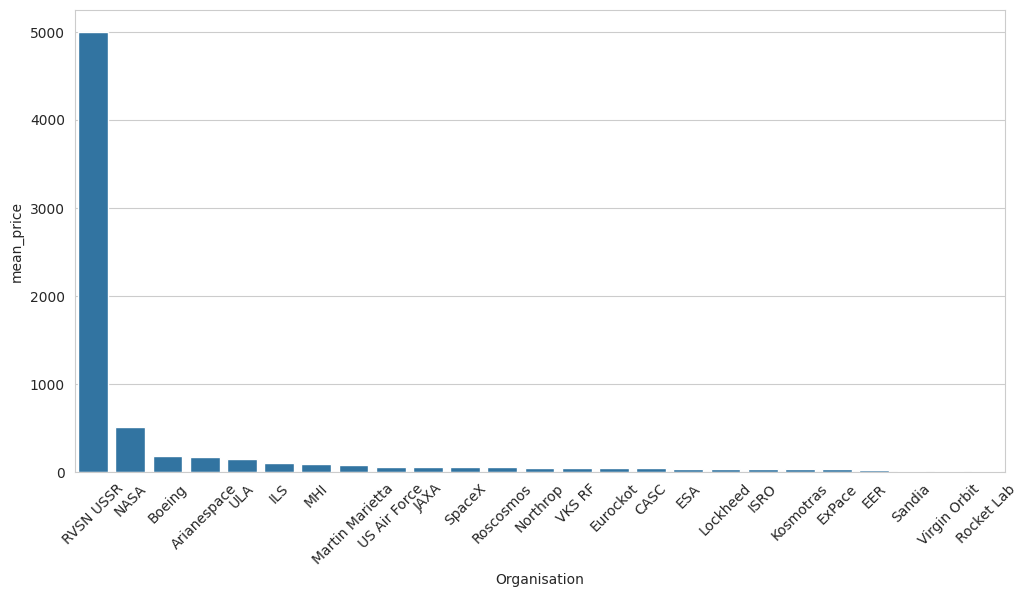

In [323]:
# Now let's plot the df_mol for mean_price per organisation
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Organisation', y='mean_price', data=df_mol)
plt.xticks(rotation=45)
plt.show()


# Chart the Number of Launches per Year

In [331]:
df_data.head()
df_data.dtypes

Unnamed: 0.1       int64
Unnamed: 0         int64
Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
country           object
iso               object
dtype: object

In [369]:
# Create a new column named "Year" that extracts the Year from the Date column
# Extract the year from the column named "Date", which is presently an object and formatted as "Tue Nov 15, 1988 03:00 UTC"
try: 
    df_data['Year'] = pd.to_datetime(df_data['Date'], format="%a %b %d, %Y %H:%M %Z", errors='coerce').dt.year
except ValueError:
    df_data['Year'] = pd.to_datetime(df_data['Date'], format="%a %b %d, %Y %H:%M").dt.year


In [370]:
# group df_data by Year, and count how many of each grouping there is.
df_grouped = df_data.groupby("Year").count()
df_grouped.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso,short_date,month_year
Year,,,,,,,,,,,,,
"1,957.00",3,3,3,3,3,3,3,0,3,3,3,3,3
"1,958.00",22,22,22,22,22,22,22,0,22,22,22,22,22
"1,959.00",20,20,20,20,20,20,20,0,20,20,20,20,20
"1,960.00",38,38,38,38,38,38,38,0,38,38,38,38,38
"1,961.00",52,52,52,52,52,52,52,0,52,52,52,52,52


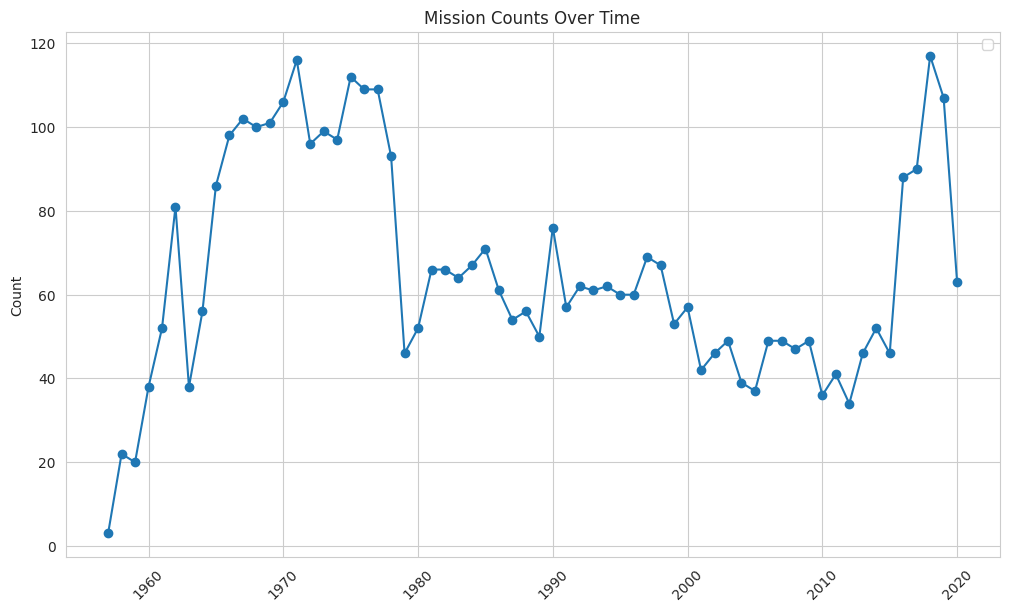

In [371]:
# Now let's chart df_grouped in a line chart, where the x is the Year, and the Y is the Mission_Status
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_grouped is your DataFrame
plt.figure(figsize=(10, 6))

plt.plot(df_grouped.index, df_grouped.Mission_Status, marker='o')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.ylabel('Count')
plt.title('Mission Counts Over Time')
plt.show()
  

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [372]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso,Year,short_date,month_year
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,"2,020.00",2020-08-07 05:12:00+00:00,2020-08
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,"2,020.00",2020-08-06 04:01:00+00:00,2020-08
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,"2,020.00",2020-08-04 23:57:00+00:00,2020-08
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,"2,020.00",2020-07-30 21:25:00+00:00,2020-07
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,"2,020.00",2020-07-30 11:50:00+00:00,2020-07


In [373]:
# Create a new column named "Year" that extracts the Year from the Date column
# Extract the year from the column named "Date", which is presently an object and formatted as "Tue Nov 15, 1988 03:00 UTC"
# try: 
#     df_data['Year'] = pd.to_datetime(df_data['Date'], format="%a %b %d, %Y %H:%M %Z", errors='coerce').dt.year
# except ValueError:
#     df_data['Year'] = pd.to_datetime(df_data['Date'], format="%a %b %d, %Y %H:%M").dt.year

df_data['short_date'] = pd.to_datetime(df_data['Date'], errors='coerce')
df_data['month_year'] = df_data['short_date'].dt.to_period('M')
df_data.head(10)


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso,Year,short_date,month_year
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,"2,020.00",2020-08-07 05:12:00+00:00,2020-08
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,"2,020.00",2020-08-06 04:01:00+00:00,2020-08
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,"2,020.00",2020-08-04 23:57:00+00:00,2020-08
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,"2,020.00",2020-07-30 21:25:00+00:00,2020-07
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,"2,020.00",2020-07-30 11:50:00+00:00,2020-07
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN,"2,020.00",2020-07-25 03:13:00+00:00,2020-07
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,Kazakhstan,KAZ,"2,020.00",2020-07-23 14:26:00+00:00,2020-07
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success,China,CHN,"2,020.00",2020-07-23 04:41:00+00:00,2020-07
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,USA,USA,"2,020.00",2020-07-20 21:30:00+00:00,2020-07
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success,Japan,JPN,"2,020.00",2020-07-19 21:58:00+00:00,2020-07


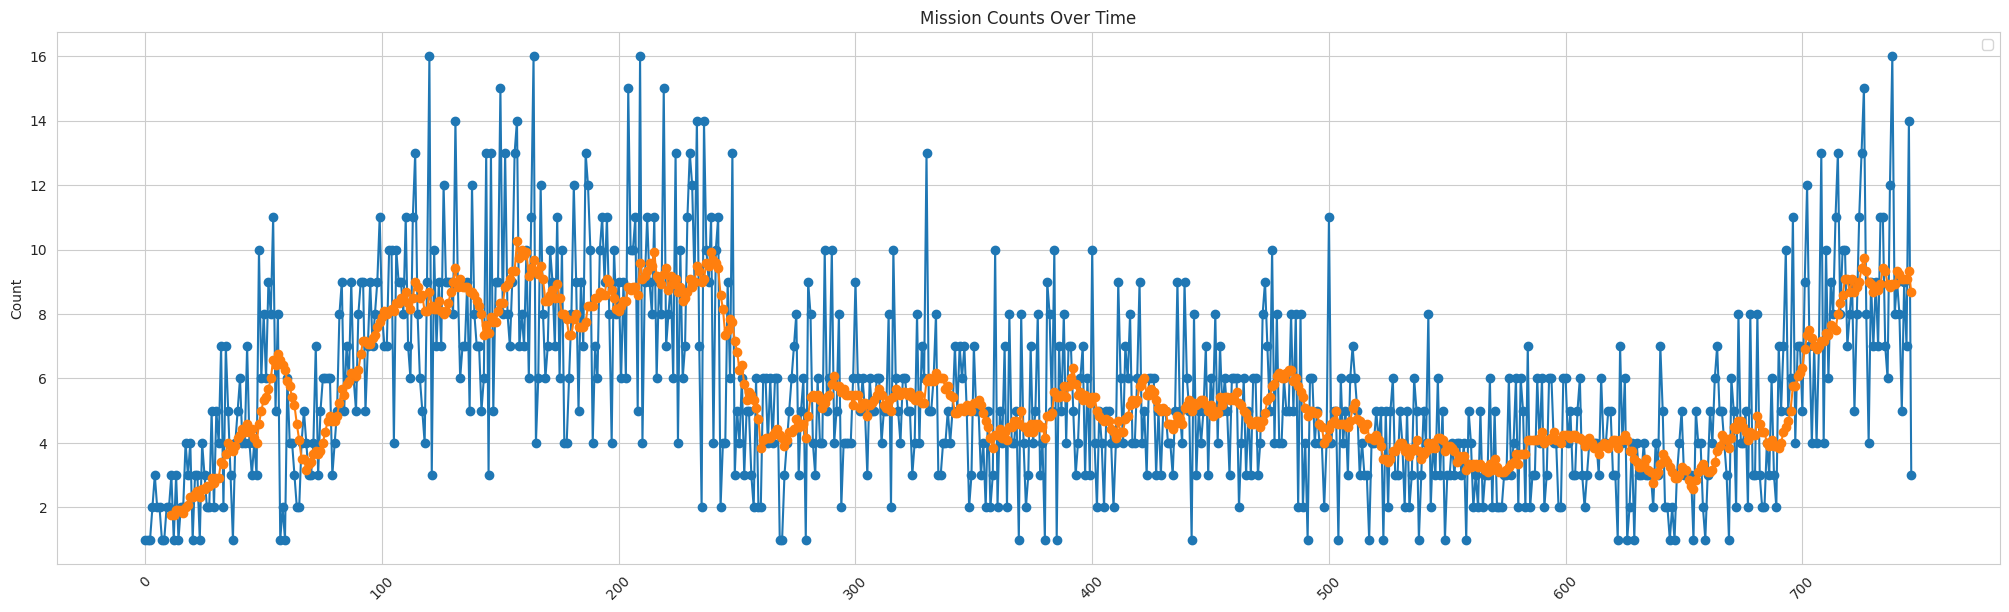

In [399]:
import pandas as pd
plt.figure(figsize=(20, 6))

df_monthly_launches = df_data.groupby(by=['month_year']).count()['Mission_Status'].reset_index()
df_monthly_launches.head(10)


plt.plot(df_monthly_launches.index, df_monthly_launches.Mission_Status, marker='o')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.ylabel('Count')
plt.title('Mission Counts Over Time')

# Add a rolling average, and plot it.
plt.plot(df_monthly_launches.index, df_monthly_launches.Mission_Status.rolling(12).mean(), marker='o')


plt.show()
  

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [396]:
# Now let's only get the month from the data.
df_data['month'] = df_data['short_date'].apply(lambda x: x.month)
df_data.head()
df_data_month = df_data.groupby('month').count()
# Sort the data
df_data_month = df_data_month.sort_values(by='month', ascending=False)
df_data_month.head(15)







,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso,Year,short_date,month_year
month,,,,,,,,,,,,,,
12.00,430,430,430,430,430,430,430,91,430,430,428,430,430,430
11.00,325,325,325,325,325,325,325,76,325,325,324,325,325,325
10.00,375,375,375,375,375,375,375,83,375,375,372,375,375,375
9.00,354,354,354,354,354,354,354,87,354,354,352,354,354,354
8.00,358,358,358,358,358,358,358,82,358,358,354,358,358,358
7.00,347,347,347,347,347,347,347,77,347,347,345,347,347,347
6.00,386,386,386,386,386,386,386,85,386,386,379,386,386,386
5.00,320,320,320,320,320,320,320,86,320,320,317,320,320,320
4.00,366,366,366,366,366,366,366,88,366,366,360,366,366,366


<BarContainer object of 12 artists>

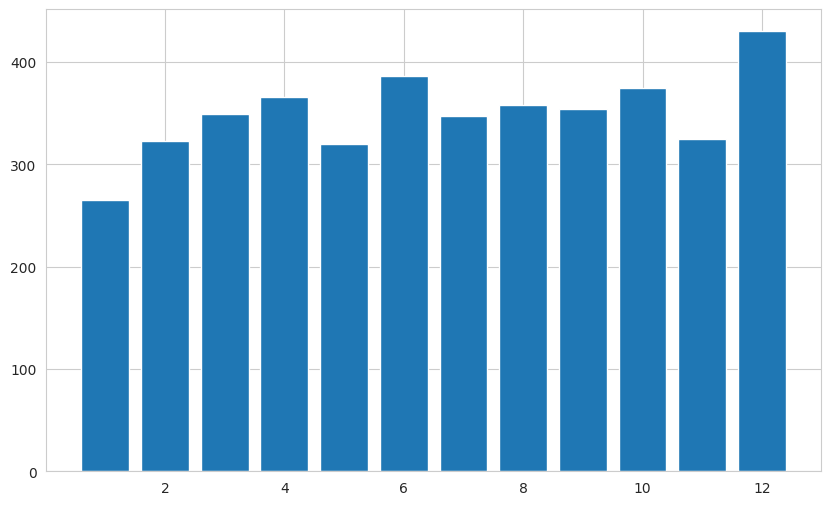

In [397]:
import matplotlib.pyplot as plt
# Now let's plot the data.  We should only have 12 months of data, and a bar chart should work just fine.  The columns are 'month'
plt.figure(figsize=(10, 6))
plt.bar(df_data_month.index, df_data_month['short_date'])



# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [406]:
df_prices['short_date'] = pd.to_datetime(df_prices['Date'], errors='coerce')
df_prices['month_year'] = df_prices['short_date'].dt.to_period('M')
df_prices.head(10)



,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,New_Price,short_date,month_year
1916,1916,1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan","Tue Nov 15, 1988 03:00 UTC",Energiya/Buran | Buran,StatusRetired,"5,000.0",Success,"5,000.00",1988-11-15 03:00:00+00:00,1988-11
2000,2000,2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.0",Success,"5,000.00",1987-05-15 17:30:00+00:00,1987-05
3475,3475,3475,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Apr 11, 1970 19:13 UTC",Saturn V | Apollo 13,StatusRetired,"1,160.0",Success,"1,160.00",1970-04-11 19:13:00+00:00,1970-04
3683,3683,3683,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Apr 04, 1968 12:00 UTC",Saturn V | Apollo 6,StatusRetired,"1,160.0",Partial Failure,"1,160.00",1968-04-04 12:00:00+00:00,1968-04
3243,3243,3243,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Apr 16, 1972 17:54 UTC",Saturn V | Apollo 16,StatusRetired,"1,160.0",Success,"1,160.00",1972-04-16 17:54:00+00:00,1972-04
3384,3384,3384,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Jan 31, 1971 21:03 UTC",Saturn V | Apollo 14,StatusRetired,"1,160.0",Success,"1,160.00",1971-01-31 21:03:00+00:00,1971-01
3603,3603,3603,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Dec 21, 1968 12:51 UTC",Saturn V | Apollo 8,StatusRetired,"1,160.0",Success,"1,160.00",1968-12-21 12:51:00+00:00,1968-12
3511,3511,3511,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Nov 14, 1969 16:22 UTC",Saturn V | Apollo 12,StatusRetired,"1,160.0",Success,"1,160.00",1969-11-14 16:22:00+00:00,1969-11
3545,3545,3545,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Wed Jul 16, 1969 13:32 UTC",Saturn V | Apollo 11,StatusRetired,"1,160.0",Success,"1,160.00",1969-07-16 13:32:00+00:00,1969-07
3584,3584,3584,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon Mar 03, 1969 16:00 UTC",Saturn V | Apollo 9,StatusRetired,"1,160.0",Success,"1,160.00",1969-03-03 16:00:00+00:00,1969-03


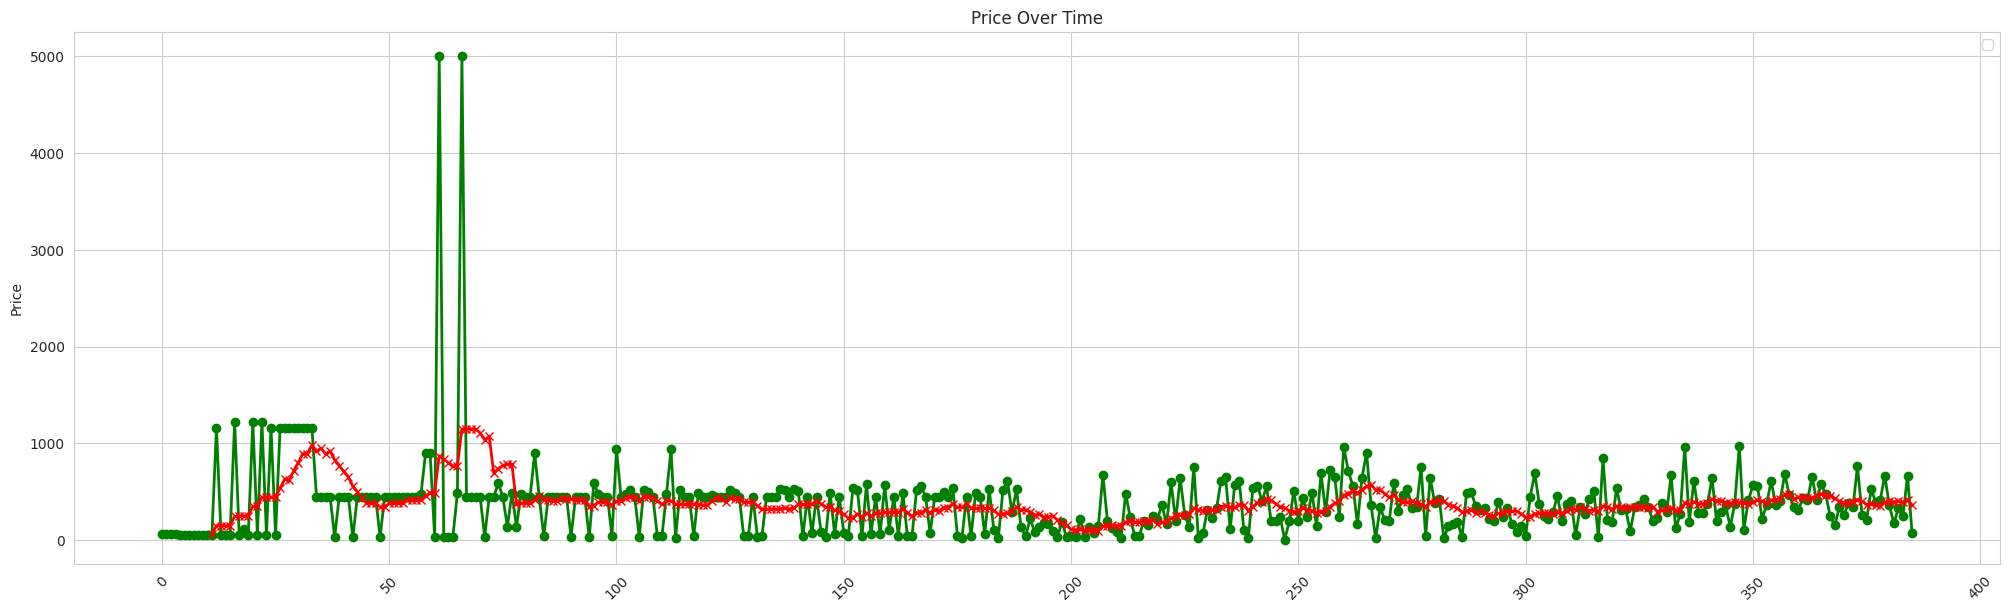

In [409]:
import pandas as pd
plt.figure(figsize=(20, 6))

# group the df_prices dataframe by month_year, and sum up the New_price

df_monthly_prices = df_prices.groupby(by=['month_year']).agg({'New_Price': 'sum'}).reset_index()
df_monthly_prices.head()


# plt.plot(df_monthly_launches.index, df_monthly_launches.Mission_Status, marker='o')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()
# plt.legend()
# plt.ylabel('Count')
# plt.title('Mission Counts Over Time')

# # Add a rolling average, and plot it.
# plt.plot(df_monthly_launches.index, df_monthly_launches.Mission_Status.rolling(12).mean(), marker='o')
# plt.show()

plt.plot(df_monthly_prices.index, df_monthly_prices.New_Price, marker='o'
         , color='green', linewidth=2)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.ylabel('Price')
plt.title('Price Over Time')

# Add a moving average to the chart
plt.plot(df_monthly_prices.index, df_monthly_prices.New_Price.rolling(12).mean()
         , marker='x', color='red', linewidth=2)
plt.show()
  

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [415]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso,Year,short_date,month_year,month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,"2,020.00",2020-08-07 05:12:00+00:00,2020-08,8.00
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,"2,020.00",2020-08-06 04:01:00+00:00,2020-08,8.00
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,"2,020.00",2020-08-04 23:57:00+00:00,2020-08,8.00
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,"2,020.00",2020-07-30 21:25:00+00:00,2020-07,7.00
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,"2,020.00",2020-07-30 11:50:00+00:00,2020-07,7.00


In [449]:
# How do we identify the top 10 organizations?  It is the money they spend or the number of launches the do?  Since we don't have pricing information for all launches, we'll use the number of launches by organization.
# define a dataframe for the top launching "Organisations" as measured by the "Mission_Status" column
top_launching_organisations = df_data[df_data["Mission_Status"] == "Success"].groupby("Organisation")["Mission_Status"].count().sort_values(ascending=False).head(10).reset_index() 
top_launching_organisations.head(10)

,Organisation,Mission_Status
0,RVSN USSR,1614
1,Arianespace,269
2,CASC,231
3,General Dynamics,203
4,VKS RF,188
5,NASA,186
6,ULA,139
7,Boeing,131
8,US Air Force,129
9,Martin Marietta,100


In [457]:
# Given the top organizations sorted in top_launching_organisations, let's next get a dataframe that only matches the Organisation in df_data.
#top_launching_organisations = sorted(df_data['Organisation'].value_counts().index.tolist())[:10]
df_top_organisations = df_data[df_data['Organisation'].isin(top_launching_organisations['Organisation'])]
df_top_organisations.shape

(3513, 15)

In [458]:
df_top_organisations.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso,Year,short_date,month_year,month
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,"2,020.00",2020-08-06 04:01:00+00:00,2020-08,8.00
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,"2,020.00",2020-07-30 11:50:00+00:00,2020-07,7.00
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN,"2,020.00",2020-07-25 03:13:00+00:00,2020-07,7.00
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success,China,CHN,"2,020.00",2020-07-23 04:41:00+00:00,2020-07,7.00
12,12,12,CASC,"LC-3, Xichang Satellite Launch Center, China","Thu Jul 09, 2020 12:11 UTC",Long March 3B/E | Apstar-6D,StatusActive,29.15,Success,China,CHN,"2,020.00",2020-07-09 12:11:00+00:00,2020-07,7.00


In [459]:
top_launching_organisations

,Organisation,Mission_Status
0,RVSN USSR,1614
1,Arianespace,269
2,CASC,231
3,General Dynamics,203
4,VKS RF,188
5,NASA,186
6,ULA,139
7,Boeing,131
8,US Air Force,129
9,Martin Marietta,100


In [460]:
df_top_organisations.describe()

,Unnamed: 0.1,Unnamed: 0,Year,month
count,"3,513.00","3,513.00","3,436.00","3,436.00"
mean,"2,407.45","2,407.45","1,983.78",6.84
std,"1,169.87","1,169.87",16.62,3.40
min,1.00,1.00,"1,957.00",1.00
25%,"1,540.00","1,540.00","1,970.00",4.00
50%,"2,490.00","2,490.00","1,980.00",7.00
75%,"3,398.00","3,398.00","1,995.00",10.00
max,"4,323.00","4,323.00","2,020.00",12.00


In [461]:
df_top_organisations.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso,Year,short_date,month_year,month
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,"2,020.00",2020-08-06 04:01:00+00:00,2020-08,8.00
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,"2,020.00",2020-07-30 11:50:00+00:00,2020-07,7.00
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,CHN,"2,020.00",2020-07-25 03:13:00+00:00,2020-07,7.00
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success,China,CHN,"2,020.00",2020-07-23 04:41:00+00:00,2020-07,7.00
12,12,12,CASC,"LC-3, Xichang Satellite Launch Center, China","Thu Jul 09, 2020 12:11 UTC",Long March 3B/E | Apstar-6D,StatusActive,29.15,Success,China,CHN,"2,020.00",2020-07-09 12:11:00+00:00,2020-07,7.00


In [462]:
# Now lets group the results by month for each org.  This means taking the df_top_organisations dataframe, and grouuping by Organisation and month_year
df_top_organisations_monthly = df_top_organisations.groupby(['Organisation', 'month_year']).count().reset_index()
df_top_organisations_monthly.head()

,Organisation,month_year,Unnamed: 0.1,Unnamed: 0,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso,Year,short_date,month
0,Arianespace,1984-05,1,1,1,1,1,1,0,1,1,1,1,1,1
1,Arianespace,1984-08,1,1,1,1,1,1,0,1,1,1,1,1,1
2,Arianespace,1984-11,1,1,1,1,1,1,0,1,1,1,1,1,1
3,Arianespace,1985-02,1,1,1,1,1,1,0,1,1,1,1,1,1
4,Arianespace,1985-05,1,1,1,1,1,1,0,1,1,1,1,1,1


In [463]:
df_top_organisations_monthly['Organisation'].unique()

array(['Arianespace', 'Boeing', 'CASC', 'General Dynamics',
       'Martin Marietta', 'NASA', 'RVSN USSR', 'ULA', 'US Air Force',
       'VKS RF'], dtype=object)

In [464]:
df_top_organisations_monthly.dtypes

Organisation         object
month_year        period[M]
Unnamed: 0.1          int64
Unnamed: 0            int64
Location              int64
Date                  int64
Detail                int64
Rocket_Status         int64
Price                 int64
Mission_Status        int64
country               int64
iso                   int64
Year                  int64
short_date            int64
month                 int64
dtype: object

In [465]:
# Now we can plot df_top_organisations_monthly with a line plot o track number of launches with "short_date" over time "month_year" for each "Organisation"
# plot the data from df_top_organisations_monthly, for each "Organisation" with the x-axis set to "month_year" and the y-axis set to "short_date"
import plotly.express as px
import pandas as pd

# Convert the "month_year" from Period to a timestamp named mon_yr
df_top_organisations_monthly["mon_yr"] = df_top_organisations_monthly["month_year"].dt.to_timestamp()
df_top_organisations_monthly.head()

# Plot the data from df_top_organisations_monthly with x-axis of mon_yr, the y-axis of "Mission_Status" and the color set to "Organisation"
fig = px.line(df_top_organisations_monthly, x="mon_yr", y="short_date", color="Organisation")
fig.show()



# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [469]:

df_cold_war = df_data[df_data["Year"] < 1992]
df_cold_war.shape


(2520, 15)

In [470]:
df_cold_war.head(10)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso,Year,short_date,month_year,month
1717,1717,1717,CASC,"LC-3, Xichang Satellite Launch Center, China","Sat Dec 28, 1991 12:00 UTC",Long March 3 | DFH-2A-T5,StatusRetired,NaN,Partial Failure,China,CHN,"1,991.00",1991-12-28 12:00:00+00:00,1991-12,12.00
1719,1719,1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia","Wed Dec 18, 1991 03:54 UTC",Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,Russia,RUS,"1,991.00",1991-12-18 03:54:00+00:00,1991-12,12.00
1720,1720,1720,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France","Mon Dec 16, 1991 22:19 UTC","Ariane 44L | Telecom 2A, Inmarsat 2F3",StatusRetired,NaN,Success,France,FRA,"1,991.00",1991-12-16 22:19:00+00:00,1991-12,12.00
1721,1721,1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA","Sat Dec 07, 1991 22:47 UTC",Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,USA,"1,991.00",1991-12-07 22:47:00+00:00,1991-12,12.00
1722,1722,1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Thu Nov 28, 1991 13:23 UTC",Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA,USA,"1,991.00",1991-11-28 13:23:00+00:00,1991-11,11.00
1723,1723,1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Wed Nov 27, 1991 03:30 UTC",Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,Russia,RUS,"1,991.00",1991-11-27 03:30:00+00:00,1991-11,11.00
1724,1724,1724,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Nov 24, 1991 23:44 UTC",Space Shuttle Atlantis | STS-44,StatusRetired,450.0,Success,USA,USA,"1,991.00",1991-11-24 23:44:00+00:00,1991-11,11.00
1725,1725,1725,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, Russia","Tue Nov 12, 1991 20:09 UTC",Tsyklon-3 | Cosmos 2165 to 2170,StatusRetired,NaN,Success,Russia,RUS,"1,991.00",1991-11-12 20:09:00+00:00,1991-11,11.00
1726,1726,1726,Martin Marietta,"SLC-4E, Vandenberg AFB, California, USA","Fri Nov 08, 1991 07:07 UTC",Titan IV(403)A | SLDCOM & NOSS 3x,StatusRetired,NaN,Success,USA,USA,"1,991.00",1991-11-08 07:07:00+00:00,1991-11,11.00
1727,1727,1727,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France","Tue Oct 29, 1991 23:08 UTC",Ariane 44L | Intelsat 6AF1,StatusRetired,NaN,Success,France,FRA,"1,991.00",1991-10-29 23:08:00+00:00,1991-10,10.00


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [472]:
df_cold_war.iso.unique()

array(['CHN', 'RUS', 'FRA', 'USA', 'KAZ', 'JPN', 'IND', 'KEN', 'AUS'],
      dtype=object)

In [481]:
# We need to add a timestamp column for the month-year
df_cold_war["mon_yr"] = df_cold_war["month_year"].dt.to_timestamp()
df_cold_war.head()


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso,Year,short_date,month_year,month,Side,mon_yr
1719,1719,1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia","Wed Dec 18, 1991 03:54 UTC",Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,Russia,RUS,"1,991.00",1991-12-18 03:54:00+00:00,1991-12,12.00,East,1991-12-01
1721,1721,1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA","Sat Dec 07, 1991 22:47 UTC",Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,USA,"1,991.00",1991-12-07 22:47:00+00:00,1991-12,12.00,West,1991-12-01
1722,1722,1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Thu Nov 28, 1991 13:23 UTC",Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA,USA,"1,991.00",1991-11-28 13:23:00+00:00,1991-11,11.00,West,1991-11-01
1723,1723,1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Wed Nov 27, 1991 03:30 UTC",Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,Russia,RUS,"1,991.00",1991-11-27 03:30:00+00:00,1991-11,11.00,East,1991-11-01
1724,1724,1724,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Nov 24, 1991 23:44 UTC",Space Shuttle Atlantis | STS-44,StatusRetired,450.0,Success,USA,USA,"1,991.00",1991-11-24 23:44:00+00:00,1991-11,11.00,West,1991-11-01


In [482]:
# Re-scope the df_cold_war dataframe to only include ISO from "RUS" "USA" "KAZ"
import pandas as pd
df_cold_war = df_cold_war[df_cold_war['iso'].isin(['RUS', 'USA', 'KAZ'])]
df_cold_war.shape

(2353, 17)

In [483]:
# Create a new column for East and West where East contains 'RUS' and "KAZ" and West Contains "USA"
df_cold_war['Side'] = df_cold_war['iso'].apply(lambda x: 'East' if 'RUS' in x or 'KAZ' in x else 'West' if 'USA' in x else np.nan)
df_cold_war.Side.unique()

array(['East', 'West'], dtype=object)

In [484]:
df_cold_war.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso,Year,short_date,month_year,month,Side,mon_yr
1719,1719,1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia","Wed Dec 18, 1991 03:54 UTC",Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,Russia,RUS,"1,991.00",1991-12-18 03:54:00+00:00,1991-12,12.00,East,1991-12-01
1721,1721,1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA","Sat Dec 07, 1991 22:47 UTC",Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,USA,"1,991.00",1991-12-07 22:47:00+00:00,1991-12,12.00,West,1991-12-01
1722,1722,1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Thu Nov 28, 1991 13:23 UTC",Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,USA,USA,"1,991.00",1991-11-28 13:23:00+00:00,1991-11,11.00,West,1991-11-01
1723,1723,1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Wed Nov 27, 1991 03:30 UTC",Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,Russia,RUS,"1,991.00",1991-11-27 03:30:00+00:00,1991-11,11.00,East,1991-11-01
1724,1724,1724,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Nov 24, 1991 23:44 UTC",Space Shuttle Atlantis | STS-44,StatusRetired,450.0,Success,USA,USA,"1,991.00",1991-11-24 23:44:00+00:00,1991-11,11.00,West,1991-11-01


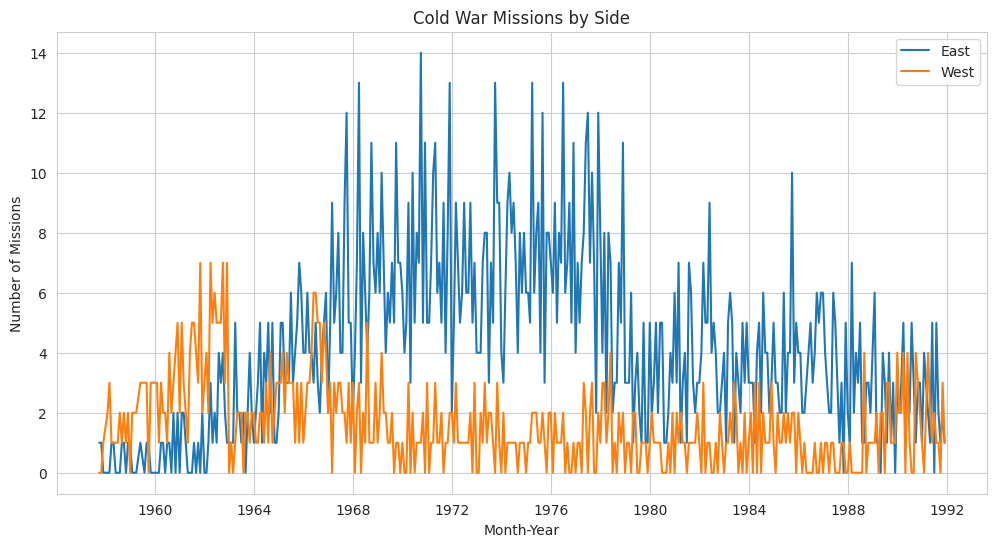

In [485]:
# Let's now count the number of Side = "East" or "West" per "month_year" into a new dataframe.
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
df_cold_war_monthly = df_cold_war.groupby(['mon_yr', 'Side']).size().unstack(fill_value=0)
df_cold_war_monthly.head()

# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_cold_war_monthly.index, df_cold_war_monthly['East'], label='East')
ax.plot(df_cold_war_monthly.index, df_cold_war_monthly['West'], label='West')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Missions')
ax.set_title('Cold War Missions by Side')

# Add a legend
ax.legend()
plt.show()


## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [489]:
# Take the df_cold_war and create a df_cold_war_yearly to group the lauches per Side by year.
df_cold_war_yearly = df_cold_war.groupby(['Year', 'Side']).size().reset_index(name='Count')
df_cold_war_yearly.head()


,Year,Side,Count
0,"1,957.00",East,2
1,"1,957.00",West,1
2,"1,958.00",East,5
3,"1,958.00",West,17
4,"1,959.00",East,4


Text(0.5, 1.0, 'Cold War Missions by Side')

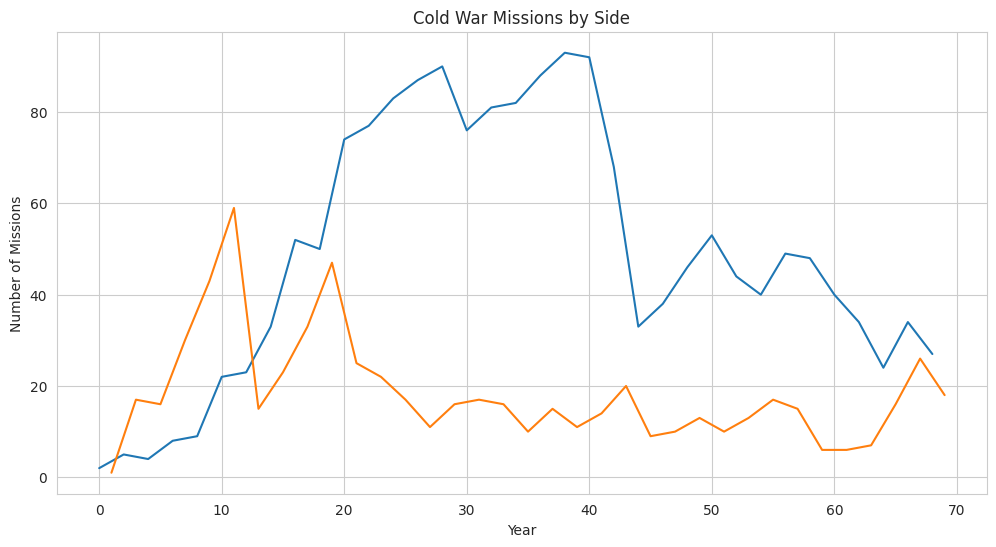

In [493]:
# Now let's plot the df_cold_war_yearly dataframe with x-axis equal to year, y-axis equal to count, and the color is the Side.
import matplotlib.pyplot as plt

# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_cold_war_yearly[df_cold_war_yearly.Side=='East'].index, df_cold_war_yearly[df_cold_war_yearly.Side =='East'].Count, label='East')
ax.plot(df_cold_war_yearly[df_cold_war_yearly.Side=='West'].index, df_cold_war_yearly[df_cold_war_yearly.Side =='West'].Count, label='West')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Missions')
ax.set_title('Cold War Missions by Side')


In [494]:
fig = px.line(df_cold_war_yearly, x="Year", y="Count", color="Side")
fig.show()


## Chart the Total Number of Mission Failures Year on Year.

In [498]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso,Year,short_date,month_year,month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,"2,020.00",2020-08-07 05:12:00+00:00,2020-08,8.00
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,"2,020.00",2020-08-06 04:01:00+00:00,2020-08,8.00
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,"2,020.00",2020-08-04 23:57:00+00:00,2020-08,8.00
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,"2,020.00",2020-07-30 21:25:00+00:00,2020-07,7.00
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,"2,020.00",2020-07-30 11:50:00+00:00,2020-07,7.00


In [499]:
df_data.Mission_Status.unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [500]:
# I'm not sure if this is for the cold war, or for everybody.  I'll select all data.df_data.
# The yearly failures are the groupby on "Year" for "Mission_Status" not equal to "Success"
df_yearly_failures = df_data[df_data["Mission_Status"] != "Success"].groupby("Year").size()
df_yearly_failures.head()


Year
1,957.00     1
1,958.00    16
1,959.00    12
1,960.00    19
1,961.00    20
            ..
2,016.00     4
2,017.00     7
2,018.00     4
2,019.00     7
2,020.00     6
Length: 64, dtype: int64

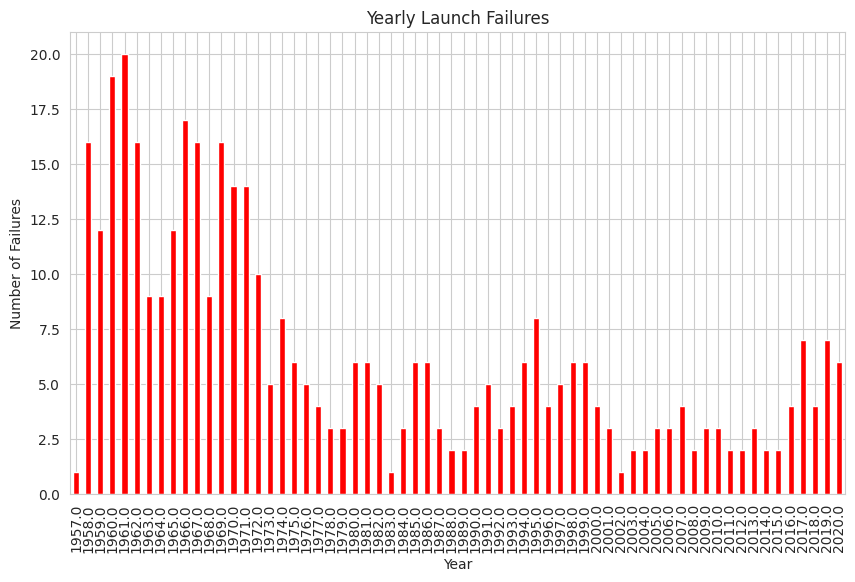

In [501]:
# The df_yearly_failures captures the number of failures per year.  
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df_yearly_failures.plot(kind='bar', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Failures')
plt.title('Yearly Launch Failures')
plt.show()


## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [502]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso,Year,short_date,month_year,month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,"2,020.00",2020-08-07 05:12:00+00:00,2020-08,8.00
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,"2,020.00",2020-08-06 04:01:00+00:00,2020-08,8.00
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,"2,020.00",2020-08-04 23:57:00+00:00,2020-08,8.00
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,"2,020.00",2020-07-30 21:25:00+00:00,2020-07,7.00
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,"2,020.00",2020-07-30 11:50:00+00:00,2020-07,7.00


In [504]:
# The failure precentage is the yearly count of Mission_Status not equal to "Success" divided by the total number of missions for that year.  We use the "Year" column.
df_data["Success_Rate"] = df_data.groupby("Year")["Mission_Status"].transform(
    lambda x: (x != "Success").sum() / len(x) * 100
)
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso,Year,short_date,month_year,month,Success_Rate
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,"2,020.00",2020-08-07 05:12:00+00:00,2020-08,8.00,9.52
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,"2,020.00",2020-08-06 04:01:00+00:00,2020-08,8.00,9.52
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,"2,020.00",2020-08-04 23:57:00+00:00,2020-08,8.00,9.52
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,"2,020.00",2020-07-30 21:25:00+00:00,2020-07,7.00,9.52
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,"2,020.00",2020-07-30 11:50:00+00:00,2020-07,7.00,9.52


In [505]:
df_yearly_success = df_data[df_data["Mission_Status"] == "Success"].groupby("Year").size()
df_yearly_success.head()


Year
1,957.00     2
1,958.00     6
1,959.00     8
1,960.00    19
1,961.00    32
dtype: int64

In [509]:
df_yearly_missions = df_data.groupby(['Year']).size()
df_yearly_missions.head()

Year
1,957.00     3
1,958.00    22
1,959.00    20
1,960.00    38
1,961.00    52
dtype: int64

In [513]:
# Now let's plot the data.
df_yearly_rate = df_yearly_success / df_yearly_missions * 100
df_yearly_rate.head()

Year
1,957.00   66.67
1,958.00   27.27
1,959.00   40.00
1,960.00   50.00
1,961.00   61.54
dtype: float64

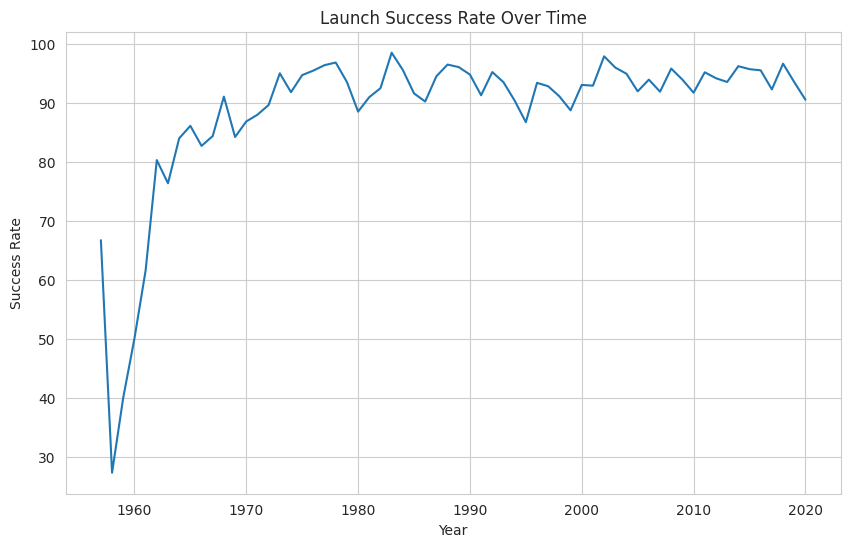

In [516]:
plt.figure(figsize=(10, 6))
plt.plot(df_yearly_rate)
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.title('Launch Success Rate Over Time')
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [520]:
# We'l use the df_data dataframe to look at the country listed as "iso" to figure out which had the most launches in a given "Year"
df_top_yearly_country = df_data.groupby(['Year', 'iso'])['Mission_Status'].sum().reset_index()
df_top_yearly_country = df_top_yearly_country.sort_values(['Year', 'Mission_Status'], ascending=[True, False])
df_top_yearly_country = df_top_yearly_country.drop_duplicates(subset=['Year'], keep='first')
df_top_yearly_country = df_top_yearly_country[['Year', 'iso', 'Mission_Status']]
df_top_yearly_country = df_top_yearly_country.rename(columns={'Mission_Status': 'Total Launches'})
df_top_yearly_country.head(10)


,Year,iso,Total Launches
0,"1,957.00",KAZ,SuccessSuccess
3,"1,958.00",USA,SuccessPartial FailureFailureFailurePartial Fa...
4,"1,959.00",KAZ,SuccessSuccessFailurePartial Failure
7,"1,960.00",USA,SuccessSuccessFailureSuccessFailureFailureSucc...
10,"1,961.00",USA,Partial FailureSuccessSuccessFailureFailureSuc...
13,"1,962.00",USA,SuccessFailureSuccessSuccessSuccessSuccessSucc...
16,"1,963.00",USA,SuccessSuccessSuccessSuccessSuccessFailureSucc...
17,"1,964.00",KAZ,SuccessSuccessSuccessSuccessSuccessSuccessSucc...
21,"1,965.00",KAZ,SuccessSuccessSuccessSuccessSuccessSuccessPart...
27,"1,966.00",USA,SuccessSuccessSuccessSuccessSuccessSuccessSucc...


<Axes: xlabel='Year', ylabel='iso'>

<Figure size 1000x600 with 0 Axes>

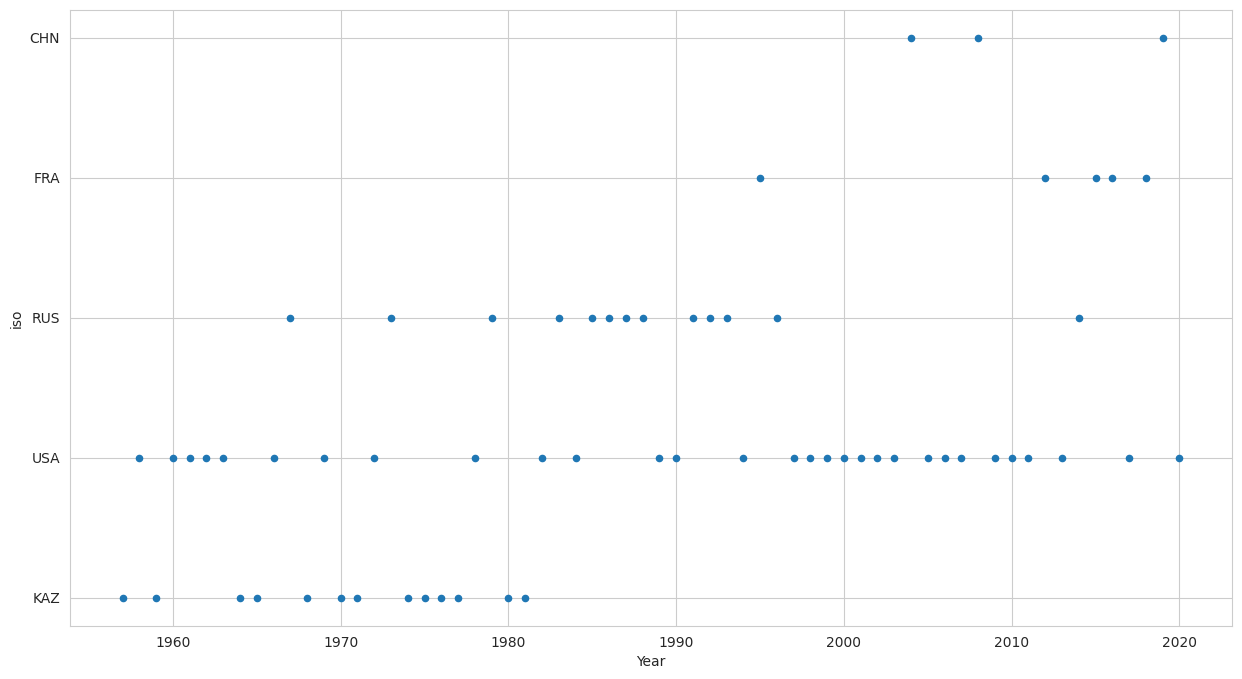

In [524]:
# now let's plot df_top_yearly_country for each iso value.  
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
df_top_yearly_country.plot(kind='scatter', x='Year', y='iso', legend=True)



# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [525]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,iso,Year,short_date,month_year,month,Success_Rate
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,"2,020.00",2020-08-07 05:12:00+00:00,2020-08,8.00,9.52
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,"2,020.00",2020-08-06 04:01:00+00:00,2020-08,8.00,9.52
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,"2,020.00",2020-08-04 23:57:00+00:00,2020-08,8.00,9.52
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,"2,020.00",2020-07-30 21:25:00+00:00,2020-07,7.00,9.52
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,"2,020.00",2020-07-30 11:50:00+00:00,2020-07,7.00,9.52


In [529]:
# For this one, we'll use the df_data dataframe, and group by the Organisation column and Year.  This will let us see who is doing the most in a given year.
df_org_yearly = df_data.groupby(['Organisation', 'Year'])['Mission_Status'].count().reset_index()
df_org_yearly.head()

,Organisation,Year,Mission_Status
0,AEB,"1,999.00",1
1,AMBA,"1,958.00",7
2,ASI,"1,967.00",1
3,ASI,"1,970.00",1
4,ASI,"1,971.00",2


In [536]:
# Now let's plot the data in df_org_yearly year by year to see who has the most.

plt.figure(figsize=(12, 5)) 

fig = px.line(df_org_yearly, x="Year", y="Mission_Status", color="Organisation")
fig.show()


<Figure size 1200x500 with 0 Axes>

In [546]:
# df_org_yearly_modern = df_org_yearly[df_org_yearly['Year' > 2017]]
df_org_yearly_modern = df_org_yearly[df_org_yearly['Year'] > 2010]
df_org_yearly_modern.head()

,Organisation,Year,Mission_Status
36,Arianespace,"2,011.00",7
37,Arianespace,"2,012.00",9
38,Arianespace,"2,013.00",7
39,Arianespace,"2,014.00",11
40,Arianespace,"2,015.00",12


In [547]:
plt.figure(figsize=(10, 6))
fig=px.line(df_org_yearly_modern, x='Year', y='Mission_Status', color='Organisation', title='Total Orders by Year and Month')
fig.show()

<Figure size 1000x600 with 0 Axes>